<a href="https://colab.research.google.com/github/Arham-12336/Final_evaluation/blob/main/Final_Evaluation_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **High Level Architecture**



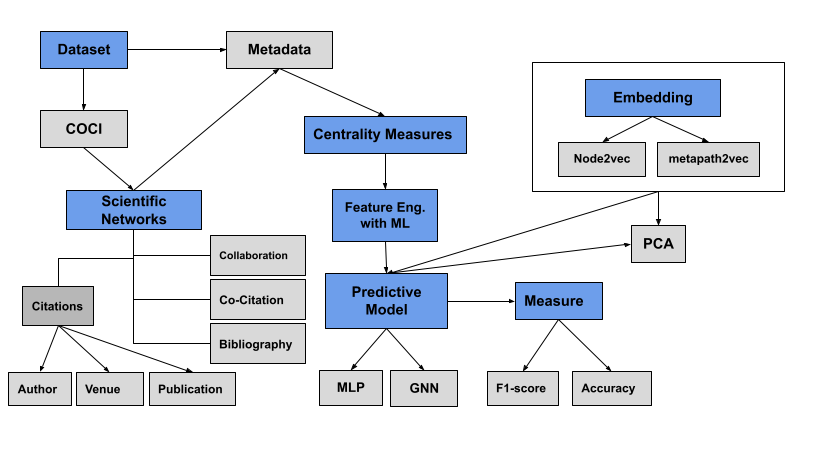

# **Importing the Libraries**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, random_split
import collections
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
import os
from torch.utils.data.dataloader import T
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from sklearn import linear_model
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from pandas.core.common import random_state
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from tensorflow import keras
from sklearn.metrics import recall_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from scipy.linalg import sqrtm 
from scipy.special import softmax
import networkx as nx
import random
from tqdm.notebook import tqdm
from torch import nn,optim,Tensor
from sklearn import model_selection, metrics,preprocessing
import time
import tensorflow as tf
from sklearn.exceptions import UndefinedMetricWarning
import warnings

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/FYP (Application of Graph embeddings)/Final Evaluation Notebook/Feature_Matrix')

# **Feature Engineering** 

In [ ]:
def features_selection(Feature_Mat):
  X =Feature_Mat.iloc[:,1:48].values
  y =Feature_Mat.iloc[:,48].values
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
  rf = RandomForestRegressor(n_estimators=150)
  rf.fit(X_train, y_train)
  sort = rf.feature_importances_.argsort()
  # # plt.barh(Feature_Mat.columns[sort], rf.feature_importances_[sort],align='center')
  # plt.xlabel("Feature Importance")
  Features=Feature_Mat.columns[sort]
  return Features
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

In [ ]:
Feature_Mat_IND=pd.read_pickle('FMat.pkl')
set1=features_selection(Feature_Mat_IND)
Feature_Mat_COM=pd.read_pickle('FMat_COM.pkl')
set2=features_selection(Feature_Mat_COM)

### **Feature Predicted as Important from data set 1**

In [ ]:
set1

Index(['OUT_Vctd_', 'IN_Pctd_', 'BC_Vctd_', 'PR_Vctd_', 'OUT_Pctd_',
       'IN_Actd_', 'ACC_Vctd_', 'CC_Vctd_', 'Hub_Actd_', 'OUT_Actd_',
       'Auth_Pctd_', 'BC_Actd_', 'CC_Actg_', 'PR_Vctg_', 'ACC_Pctd_',
       'Hub_Pctg_', 'BC_Pctd_', 'Auth_Vctd_', 'PR_Pctg_', 'Hub_Vctg_',
       'ACC_Actd_', 'IN_Pctg_', 'Auth_Vctg_', 'Auth_Actd_', 'IN_Vctd_',
       'CC_Pctd_', 'BC_Vctg_', 'PR_Actd_', 'Hub_Vctd_', 'Auth_Pctg_',
       'ACC_Vctg_', 'IN_Actg_', 'IN_Vctg_', 'Hub_Actg_', 'CC_Vctg_',
       'OUT_Vctg_', 'Auth_Actg_', 'BC_Actg_', 'CC_Pctg_', 'OUT_Pctg_',
       'PR_Actg_', 'PR_Pctd_', 'BC_Pctg_', 'ACC_Actg_', 'ACC_Pctg_',
       'OUT_Actg_', 'Hub_Pctd_'],
      dtype='object')

### **Feature Predicted as Important from data set 2**

In [ ]:
set2

Index(['IN_Pctd_', 'BC_Vctd_', 'OUT_Vctd_', 'ACC_Vctd_', 'PR_Vctd_',
       'Hub_Vctd_', 'OUT_Pctd_', 'Auth_Vctd_', 'IN_Vctd_', 'IN_Actd_',
       'PR_Pctd_', 'IN_Pctg_', 'OUT_Actd_', 'ACC_Pctd_', 'Auth_Pctd_',
       'IN_Actg_', 'Auth_Vctg_', 'Auth_Pctg_', 'Hub_Actd_', 'ACC_Actd_',
       'IN_Vctg_', 'Hub_Pctg_', 'Hub_Vctg_', 'Auth_Actd_', 'PR_Vctg_',
       'BC_Pctd_', 'Auth_Actg_', 'BC_Vctg_', 'CC_Vctg_', 'CC_Vctd_',
       'Hub_Actg_', 'CC_Pctg_', 'PR_Actd_', 'CC_Pctd_', 'PR_Pctg_',
       'ACC_Vctg_', 'BC_Actd_', 'PR_Actg_', 'CC_Actg_', 'ACC_Actg_',
       'Hub_Pctd_', 'BC_Actg_', 'OUT_Actg_', 'OUT_Vctg_', 'BC_Pctg_',
       'ACC_Pctg_', 'OUT_Pctg_'],
      dtype='object')

# **Machine Learning with Cross Validation**
We have utilized different Machine Learning algorithms to become more accurate at predicting outcomes to our feature matrix data frame. In this notebook we  have implement different machine learning algorithms and results obtained on our 2 data frames obtained through finding different centrality features for different articles. The first data set 1 contains 6146 rows and the data set 2 has 95136 rows both have same no features (48) along with the annotated label (True/False).


In [ ]:
Feature_mat=pd.concat([Feature_Mat_IND, Feature_Mat_COM])

### **Approach I**
In this approach we have used the Feature [importance function](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285) on Random forest to identify the important features (network-based).We have used top 30 features predicted as important for the IND feature matrix. We firstly combine both the data sets.Combinely they have 101282 rows with 30 features and 1 labeled column

In [ ]:
Features_1=Feature_mat[['ACC_Actd_','BC_Pctd_','Auth_Vctg_','IN_Pctg_','PR_Vctg_','PR_Actd_','Hub_Vctg_','PR_Pctg_','Auth_Pctg_',
 'Hub_Vctd_','IN_Vctd_','BC_Vctg_','ACC_Vctg_','CC_Pctd_','IN_Actg_','IN_Vctg_','Hub_Actg_','OUT_Vctg_','PR_Pctd_','OUT_Pctg_',
 'Auth_Actg_','BC_Actg_','CC_Pctg_','CC_Vctg_','OUT_Actg_','PR_Actg_','ACC_Pctg_','ACC_Actg_','BC_Pctg_','Hub_Pctd_','y']]

**Results**

In [ ]:
ML_on_FMat(Features_1)

Split number:  1
Split number:  2
Split number:  3
Split number:  4
Split number:  5
Logistic Regression:  [0.13333333333333333, 0.05479452054794521, 0.0, 0.0, 0.0]
SVM:  [0.0, 0.0, 0.0, 0.0, 0.0]
Random Forest:  [0.05434782608695652, 0.0, 0.0, 0.0, 0.0]
KNN with n=3:  [0.07488986784140969, 0.02531645569620253, 0.17142857142857143, 0.25, 0.030303030303030307]
Decision Tree:  [0.03487179487179487, 0.046511627906976744, 0.14492753623188406, 0.002352479905900804, 0.1388888888888889]


### **Approach II:**
In this approach we have used the Feature [importance function](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285) on Random forest to identify the important features (network-based).We have used top 30 features predicted as important for the COM feature matrix. We firstly combine both the dataframe IND and COM.Combinely they have 101282 rows with 30 features and 1 labeled column

In [ ]:
Features_2=Feature_mat[['IN_Vctg_','Auth_Pctd_','Auth_Pctg_','Hub_Vctg_','PR_Vctg_','Hub_Pctg_','BC_Pctd_','ACC_Actd_','CC_Vctg_',
 'Auth_Actg_','Hub_Actg_','BC_Vctg_','Auth_Actd_','CC_Pctd_','PR_Actd_','CC_Vctd_','CC_Pctg_','PR_Pctg_','ACC_Vctg_','PR_Actg_',
 'BC_Actd_','CC_Actg_','ACC_Actg_','BC_Actg_','Hub_Pctd_','OUT_Actg_','OUT_Vctg_','ACC_Pctg_','BC_Pctg_','OUT_Pctg_','y']]

**Results**

In [ ]:
ML_on_FMat(Features_2)

Split number:  1
Split number:  2
Split number:  3
Split number:  4
Split number:  5
Logistic Regression:  [0.17441860465116282, 0.029850746268656723, 0.03076923076923077, 0.0, 0.0]
SVM:  [0.13793103448275862, 0.0, 0.0, 0.0, 0.0]
Random Forest:  [0.14666666666666667, 0.0, 0.0, 0.02857142857142857, 0.0]
KNN with n=3:  [0.08212560386473429, 0.11363636363636362, 0.14492753623188406, 0.2666666666666666, 0.08823529411764706]
Decision Tree:  [0.05412054120541206, 0.10055865921787709, 0.20512820512820512, 0.19047619047619047, 0.21333333333333335]


### **Approach III:**
In this approach we have used the Feature importance function [1] on Random forest to identify the important features (network-based).We have used 24 features which were common in both  feature matrices. We firstly combine both the dataframe IND and COM.Combinely they have 101282 rows with 24 features and 1 labeled column.

In [ ]:
Features_3=Feature_mat[['ACC_Actd_', 'BC_Pctd_', 'PR_Vctg_', 'PR_Actd_', 'Hub_Vctg_', 'PR_Pctg_', 'Auth_Pctg_', 'BC_Vctg_', 'ACC_Vctg_', 'CC_Pctd_', 'IN_Vctg_', 'Hub_Actg_', 'OUT_Vctg_', 'OUT_Pctg_', 'Auth_Actg_', 'BC_Actg_', 'CC_Pctg_', 'CC_Vctg_', 'OUT_Actg_', 'PR_Actg_', 'ACC_Pctg_', 'ACC_Actg_', 'BC_Pctg_', 'Hub_Pctd_','y']]

**Results**

In [ ]:
ML_on_FMat(Features_3)

Split number:  1
Split number:  2
Split number:  3
Split number:  4
Split number:  5
Logistic Regression:  [0.11640211640211642, 0.0, 0.0, 0.0, 0.0]
SVM:  [0.0, 0.0, 0.0, 0.0, 0.0]
Random Forest:  [0.08391608391608392, 0.0, 0.0, 0.0, 0.030303030303030307]
KNN with n=3:  [0.06388206388206388, 0.04878048780487805, 0.14492753623188406, 0.1758241758241758, 0.08823529411764706]
Decision Tree:  [0.04915912031047866, 0.06289308176100629, 0.19178082191780824, 0.001851851851851852, 0.11594202898550725]


In [ ]:
def ML_on_FMat(Features):
  X =Features.iloc[:,1:24].values
  y = Features.iloc[:,24].values
  folds=StratifiedKFold(n_splits=5)
  scores_logistic=[]
  score_svm=[]
  score_random_forest=[]
  score_naive_bayes=[]
  score_knn=[]
  score_decision_tree=[]
  i=1
  def show(scores_logistic,score_svm,score_random_forest,score_naive_bayes,score_knn,score_decision_tree):
    print("Logistic Regression: ",scores_logistic)
    print("SVM: ",score_svm)
    print("Random Forest: ",score_random_forest)
    print("KNN with n=3: ",score_knn)
    print("Decision Tree: ",score_decision_tree)
  def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
#     get_roc(model,y_pred,y_test)
#     return metrics.roc_auc_score(y_test, y_pred)
    return metrics.f1_score(y_test, y_pred)
    

  for train_index,test_index in folds.split(X,y):    
    print("Split number: ",i)
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], \
                                       y[train_index], y[test_index]
    scores_logistic.append(get_score(LogisticRegression(solver='lbfgs', max_iter=1000),X_train,X_test,y_train,y_test))
    score_svm.append(get_score(SVC(),X_train,X_test,y_train,y_test))
    score_random_forest.append(get_score(RandomForestClassifier(n_estimators=50,random_state=0),X_train,X_test,y_train,y_test))
    score_naive_bayes.append(get_score(GaussianNB(),X_train,X_test,y_train,y_test))
    score_knn.append(get_score(KNeighborsClassifier(3),X_train,X_test,y_train,y_test))
    score_decision_tree.append(get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test))
    
    i=i+1
  show(scores_logistic,score_svm,score_random_forest,score_naive_bayes,score_knn,score_decision_tree)


# **Machine Learning with PCA**

In [ ]:
def train_test_ML2(dataset, dataform, X_train, y_train, X_test, y_test):
    temp_df = pd.DataFrame(columns=['Data Set', 'Data Form', 'Dimensions', 'Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision','Time Taken'])
    for i in [LogisticRegression, KNeighborsClassifier, SVC, DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier]:
        start_time = time.time()
        reg = i().fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        accuracy = np.round(accuracy_score(y_test, y_pred), 2)
        f1 = np.round(f1_score(y_test, y_pred, average='weighted'), 2)
        recall = np.round(recall_score(y_test, y_pred, average='weighted'), 2)
        precision = np.round(precision_score(y_test, y_pred, average='weighted'), 2)
        end_time = time.time()
        time_taken = np.round((end_time - start_time), 2)
        y_pred = pd.DataFrame(y_pred)
        temp_df.loc[len(temp_df)] = [dataset, dataform, X_train.shape[1], str(i).split('.')[-1][:-2], accuracy, f1, recall, precision,time_taken]
    return temp_df

mlp_clf = MLPClassifier(hidden_layer_sizes=(5,2),max_iter = 300,activation = 'relu',solver = 'adam')
mlp_clf = MLPClassifier(hidden_layer_sizes=(48,10,2),max_iter = 300,activation = 'relu',solver = 'adam')
def MLP(dataset, dataform, X_train, y_train, X_test, y_test):
  temp_df = pd.DataFrame(columns=['Data Set', 'Data Form', 'Dimensions', 'Model', 'Accuracy', 'F1 Score', 'Recall', 'Precision','Time Taken'])
  start_time = time.time()
  reg = mlp_clf.fit(X_train, y_train)
  y_pred = reg.predict(X_test)
  accuracy = np.round(accuracy_score(y_test, y_pred), 2)
  f1 = np.round(f1_score(y_test, y_pred, average='weighted'), 2)
  recall = np.round(recall_score(y_test, y_pred, average='weighted'), 2)
  precision = np.round(precision_score(y_test, y_pred, average='weighted'), 2)
  end_time = time.time()
  time_taken = np.round((end_time - start_time), 2)
  y_pred = pd.DataFrame(y_pred)
  temp_df.loc[len(temp_df)] = [dataset, dataform, X_train.shape[1], 'MLP Classifier', accuracy, f1, recall, precision,time_taken]

  return temp_df

## **Dimension Reduction Through different techniques**
Performs feature preprocessing techniques to prepare the data for a machine learning model. These techniques include standard scaling, principal component analysis (PCA), linear discriminant analysis (LDA), and singular value decomposition (SVD).Standard scaling is used to scale the features so that they have a mean of zero and a standard deviation of one, which can improve the performance of some machine learning algorithms.hese techniques are used to preprocess the data in different ways to prepare it for a machine learning model. The choice of which technique to use depends on the specific characteristics of the data and the requirements of the machine learning model.

In [ ]:
df = pd.read_pickle('FMat.pkl')
X=df.iloc[:,0:48]
y=df.iloc[:,48]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape
#standard scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train.shape, X_test.shape
#PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
#LDA
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#SVD
svd = TruncatedSVD(n_components=int(X_train.shape[1]*0.33))
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

## **Result of Machine Learning after dimensionality reduction on data set-1**

In [ ]:
new_df = train_test_ML2('features_matrix', 'Orignal', X_train, y_train, X_test, y_test)
new_mlp_df = MLP('features_matrix', 'Orignal', X_train, y_train, X_test, y_test)
new_df= new_df.append(new_mlp_df, ignore_index=True)
new_df

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,Orignal,48,LogisticRegression,0.97,0.97,0.97,0.96,0.58
1,features_matrix,Orignal,48,KNeighborsClassifier,0.97,0.96,0.97,0.96,0.37
2,features_matrix,Orignal,48,SVC,0.98,0.97,0.98,0.96,0.33
3,features_matrix,Orignal,48,DecisionTreeClassifier,0.95,0.96,0.95,0.96,0.05
4,features_matrix,Orignal,48,RandomForestClassifier,0.97,0.97,0.97,0.96,0.67
5,features_matrix,Orignal,48,GradientBoostingClassifier,0.97,0.97,0.97,0.96,1.46
6,features_matrix,Orignal,48,MLP Classifier,0.97,0.97,0.97,0.96,11.75


In [ ]:
newPCA_df = train_test_ML2('features_matrix', 'PCA Reduced', X_train_pca, y_train, X_test_pca, y_test)
newPCA_mlp_df = MLP('features_matrix', 'PCA Reduced', X_train_pca, y_train, X_test_pca, y_test)
newPCA_df= newPCA_df.append(newPCA_mlp_df, ignore_index=True)
newPCA_df

,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,PCA Reduced,20,LogisticRegression,0.98,0.97,0.98,0.96,0.10
1,features_matrix,PCA Reduced,20,KNeighborsClassifier,0.97,0.97,0.97,0.96,0.30
2,features_matrix,PCA Reduced,20,SVC,0.98,0.97,0.98,0.96,0.29
3,features_matrix,PCA Reduced,20,DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.12
4,features_matrix,PCA Reduced,20,RandomForestClassifier,0.98,0.97,0.98,0.96,1.60
5,features_matrix,PCA Reduced,20,GradientBoostingClassifier,0.97,0.97,0.97,0.96,2.92
6,features_matrix,PCA Reduced,20,MLP Classifier,0.97,0.97,0.97,0.97,5.50


In [ ]:
newSVD_df = train_test_ML2('features_matrix', 'SVD Reduced', X_train_svd, y_train, X_test_svd, y_test)
newSVD_mlp_df = MLP('features_matrix', 'SVD Reduced', X_train_svd, y_train, X_test_svd, y_test)
newSVD_df= newSVD_df.append(newSVD_mlp_df, ignore_index=True)
newSVD_df

,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,SVD Reduced,15,LogisticRegression,0.98,0.97,0.98,0.96,0.04
1,features_matrix,SVD Reduced,15,KNeighborsClassifier,0.97,0.97,0.97,0.96,0.12
2,features_matrix,SVD Reduced,15,SVC,0.98,0.97,0.98,0.96,0.17
3,features_matrix,SVD Reduced,15,DecisionTreeClassifier,0.96,0.96,0.96,0.96,0.06
4,features_matrix,SVD Reduced,15,RandomForestClassifier,0.98,0.97,0.98,0.96,1.42
5,features_matrix,SVD Reduced,15,GradientBoostingClassifier,0.97,0.97,0.97,0.96,3.17
6,features_matrix,SVD Reduced,15,MLP Classifier,0.97,0.97,0.97,0.96,5.66


In [ ]:
newLDA_df = train_test_ML2('features_matrix', 'LDA Reduced', X_train_lda, y_train, X_test_lda, y_test)
newLDA_mlp_df = MLP('features_matrix', 'LDA Reduced', X_train_lda, y_train, X_test_lda, y_test)
newLDA_df= newLDA_df.append(newLDA_mlp_df, ignore_index=True)
newLDA_df

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,LDA Reduced,1,LogisticRegression,0.97,0.97,0.97,0.96,0.01
1,features_matrix,LDA Reduced,1,KNeighborsClassifier,0.97,0.97,0.97,0.96,0.05
2,features_matrix,LDA Reduced,1,SVC,0.98,0.97,0.98,0.96,0.14
3,features_matrix,LDA Reduced,1,DecisionTreeClassifier,0.97,0.97,0.97,0.97,0.01
4,features_matrix,LDA Reduced,1,RandomForestClassifier,0.97,0.97,0.97,0.97,0.46
5,features_matrix,LDA Reduced,1,GradientBoostingClassifier,0.98,0.97,0.98,0.97,0.28
6,features_matrix,LDA Reduced,1,MLP Classifier,0.97,0.97,0.97,0.96,10.56


## **Result of Machine Leaning after dimensionality reduction on data set-2**

In [ ]:
new_df = train_test_ML2('features_matrix', 'Orignal', X_train, y_train, X_test, y_test)
new_mlp_df = MLP('features_matrix', 'Orignal', X_train, y_train, X_test, y_test)
new_df= new_df.append(new_mlp_df, ignore_index=True)
new_df

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,Orignal,48,LogisticRegression,1.0,1.0,1.0,1.0,1.29
1,features_matrix,Orignal,48,KNeighborsClassifier,1.0,1.0,1.0,1.0,36.88
2,features_matrix,Orignal,48,SVC,1.0,1.0,1.0,1.0,4.32
3,features_matrix,Orignal,48,DecisionTreeClassifier,1.0,1.0,1.0,1.0,0.45
4,features_matrix,Orignal,48,RandomForestClassifier,1.0,1.0,1.0,1.0,5.23
5,features_matrix,Orignal,48,GradientBoostingClassifier,1.0,1.0,1.0,1.0,20.53
6,features_matrix,Orignal,48,MLP Classifier,1.0,1.0,1.0,1.0,26.35


In [ ]:
newPCA_df = train_test_ML2('features_matrix', 'PCA Reduced', X_train_pca, y_train, X_test_pca, y_test)
newPCA_mlp_df = MLP('features_matrix', 'PCA Reduced', X_train_pca, y_train, X_test_pca, y_test)
newPCA_df= newPCA_df.append(newPCA_mlp_df, ignore_index=True)
newPCA_df

,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,PCA Reduced,20,LogisticRegression,1.0,1.0,1.0,1.0,0.90
1,features_matrix,PCA Reduced,20,KNeighborsClassifier,1.0,1.0,1.0,1.0,34.10
2,features_matrix,PCA Reduced,20,SVC,1.0,1.0,1.0,1.0,4.81
3,features_matrix,PCA Reduced,20,DecisionTreeClassifier,1.0,1.0,1.0,1.0,2.48
4,features_matrix,PCA Reduced,20,RandomForestClassifier,1.0,1.0,1.0,1.0,26.49
5,features_matrix,PCA Reduced,20,GradientBoostingClassifier,1.0,1.0,1.0,1.0,63.47
6,features_matrix,PCA Reduced,20,MLP Classifier,1.0,1.0,1.0,1.0,41.25


In [ ]:
newSVD_df = train_test_ML2('features_matrix', 'SVD Reduced', X_train_svd, y_train, X_test_svd, y_test)
newSVD_mlp_df = MLP('features_matrix', 'SVD Reduced', X_train_svd, y_train, X_test_svd, y_test)
newSVD_df= newSVD_df.append(newSVD_mlp_df, ignore_index=True)
newSVD_df

,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,SVD Reduced,15,LogisticRegression,1.0,1.0,1.0,1.0,0.57
1,features_matrix,SVD Reduced,15,KNeighborsClassifier,1.0,1.0,1.0,1.0,2.43
2,features_matrix,SVD Reduced,15,SVC,1.0,1.0,1.0,1.0,5.19
3,features_matrix,SVD Reduced,15,DecisionTreeClassifier,1.0,1.0,1.0,1.0,1.15
4,features_matrix,SVD Reduced,15,RandomForestClassifier,1.0,1.0,1.0,1.0,19.20
5,features_matrix,SVD Reduced,15,GradientBoostingClassifier,1.0,1.0,1.0,1.0,52.19
6,features_matrix,SVD Reduced,15,MLP Classifier,1.0,1.0,1.0,1.0,12.56


In [ ]:
newLDA_df = train_test_ML2('features_matrix', 'LDA Reduced', X_train_lda, y_train, X_test_lda, y_test)
newLDA_mlp_df = MLP('features_matrix', 'LDA Reduced', X_train_lda, y_train, X_test_lda, y_test)
newLDA_df= newLDA_df.append(newLDA_mlp_df, ignore_index=True)
newLDA_df

,Data Set,Data Form,Dimensions,Model,Accuracy,F1 Score,Recall,Precision,Time Taken
0,features_matrix,LDA Reduced,1,LogisticRegression,1.0,1.0,1.0,1.0,0.13
1,features_matrix,LDA Reduced,1,KNeighborsClassifier,1.0,1.0,1.0,1.0,0.59
2,features_matrix,LDA Reduced,1,SVC,1.0,1.0,1.0,1.0,1.83
3,features_matrix,LDA Reduced,1,DecisionTreeClassifier,1.0,1.0,1.0,1.0,0.12
4,features_matrix,LDA Reduced,1,RandomForestClassifier,1.0,1.0,1.0,1.0,6.35
5,features_matrix,LDA Reduced,1,GradientBoostingClassifier,1.0,1.0,1.0,1.0,6.63
6,features_matrix,LDA Reduced,1,MLP Classifier,1.0,1.0,1.0,1.0,5.73





# **Node Embeddings**

## **Node2vec**

In [ ]:
Fmat_venue =  pd.read_pickle("autCOCI.pkl")
Fmat_venue = Fmat_venue.drop(['citing','cited','autID_citing','autID_cited'], axis=1)
Venue_CC = nx.from_pandas_edgelist(Fmat_venue, 'Venue_citing','Venue_cited')

# Generate walks
node2vec = Node2Vec(Venue_CC, dimensions=120, walk_length=10, num_walks=80)

# train node2vec model
n2w_model = node2vec.fit(window=10, min_count=1)

Computing transition probabilities:   0%|          | 0/2265 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████| 80/80 [00:58<00:00,  1.37it/s]


In [ ]:
x = [n2w_model.wv.get_vector(str(i)) + n2w_model.wv.get_vector(str(j)) for i,j in zip(Fmat_venue['Venue_citing'], Fmat_venue['Venue_cited'])]

In [ ]:
print(x)

[array([-0.02531544, -0.01567325,  0.2754805 , -0.01991699, -0.36444062,
       -0.18773684,  0.1728304 ,  0.3864327 , -0.16679867, -0.06387453,
        0.4155078 , -0.09938854, -0.10296049,  0.05013197, -0.3037442 ,
       -0.1779306 ,  0.11769894,  0.26742193, -0.29124188, -0.25240386,
       -0.00416375,  0.07295416,  0.39664125,  0.08919789, -0.15146512,
       -0.09143393, -0.04041345,  0.11263194, -0.19630039, -0.18151048,
       -0.4149043 , -0.1737745 ,  0.16549829, -0.34755152, -0.01545451,
       -0.14655626,  0.32831988, -0.2547088 ,  0.08795731, -0.08767962,
       -0.31017828,  0.03585269, -0.10271694, -0.13865727, -0.05555357,
        0.06561778, -0.1861123 ,  0.15937153,  0.10119034,  0.24717984,
       -0.1517662 , -0.19363326, -0.223874  , -0.09172207,  0.2643564 ,
       -0.00493366,  0.13918194,  0.14307228,  0.20038   ,  0.06172736,
       -0.0247543 , -0.03798663,  0.12404887,  0.14198813, -0.02408081,
        0.07611497,  0.01038226,  0.20492324, -0.1429008 ,  0.0

In [ ]:
np.shape(x)

(1000, 120)

# **MetaPath**

In [ ]:
def HetroData():

  data = HeteroData()
  pubCent = pd.read_pickle(pubCentPkl)
  venCent = pd.read_pickle(venCentPkl)
  autCent = pd.read_pickle(autCentPkl)
  autCOCI = pd.read_pickle(autCitNet)

  COCI = pd.read_pickle(citNet)
  DF = pd.read_pickle(metadata).reset_index()
  pubCN = COCI.drop(columns=['Venue_citing','Venue_cited','Title_citing','Title_cited'], axis=1)
  venCN = COCI.drop(columns=['citing','cited','Title_citing','Title_cited'], axis=1)
  autCN = autCOCI.drop(columns=['Venue_citing','Venue_cited','citing','cited'], axis=1)
  autCN = autCN.drop_duplicates()
  autCN.rename(columns = {'autID_citing':'citing','autID_cited':'cited'}, inplace = True)
  pubCent = pubCent.reset_index()
  pubCent['index']=pubCent.index
  pubCent = pubCent.set_index('Publication').drop(columns=['IN','OUT','ACC','Hub','Auth','PR','BC','CC'], axis=1)
  venCent = venCent.reset_index()
  venCent['index']=venCent.index
  venCent = venCent.set_index('Venue').drop(columns=['IN','OUT','ACC','Hub','Auth','PR','BC','CC'], axis=1)
  autCent = autCent.reset_index()
  autCent['index']=autCent.index
  autCent = autCent.set_index('Author').drop(columns=['IN','OUT','ACC','Hub','Auth','PR','BC','CC'], axis=1)
  autCent = autCent.reset_index()
  autCN = autCN.merge(autCent, left_on='citing', right_index=True)
  autCN = autCN.merge(autCent, left_on='cited', right_index=True, suffixes=['_citing','_cited'])
  pubCN = pubCN.merge(pubCent, left_on='citing', right_index=True)
  pubCN = pubCN.merge(pubCent, left_on='cited', right_index=True, suffixes=['_citing','_cited'])
  venCN = venCN.merge(venCent, left_on='Venue_citing', right_index=True)
  venCN = venCN.merge(venCent, left_on='Venue_cited', right_index=True, suffixes=['_citing','_cited'])
  DF_Author = DF.copy()

  DF_Author = DF_Author.merge(pubCent, left_on='DOI', right_index=True)
  DF_Author = DF_Author.merge(autCent, left_on='Author', right_on='Author', suffixes=['_DOI','_Author'])
  DF_Author = DF_Author.drop(columns=['DOI','Title','Venue','Year','Author'],axis=1).groupby('index_DOI').first().reset_index()


  #1st MetaPath
  src = list(DF_Author.index_Author)
  dst = list(DF_Author.index_DOI)
  edge_index = torch.tensor([src, dst])
  data['Author', 'writes', 'Publication'].edge_index = edge_index

  #2nd MetaPath
  src = list(pubCN.index_citing)
  dst = list(pubCN.index_cited)
  edge_index = torch.tensor([src, dst])
  data['Publication', 'cite', 'Publication'].edge_index = edge_index


  #3rd MetaPath
  DF = DF.merge(pubCent, left_on='DOI', right_index=True)
  DF = DF.merge(venCent, left_on='Venue', right_index=True, suffixes=['_DOI','_Venue'])
  DF = DF.drop(columns=['DOI','Title','Venue','Year','Author'],axis=1).groupby('index_DOI').first().reset_index()
  src = list(DF.index_DOI)
  dst = list(DF.index_Venue)
  edge_index = torch.tensor([src, dst])#.t().contiguous()
  data['Publication', 'in', 'Venue'].edge_index = edge_index


  #4th MetaPath
  DF = pd.read_pickle(metadata).reset_index()
  DF = DF.merge(venCent, left_on='Venue', right_index=True)
  DF = DF.merge(autCent, left_on='Author', right_on='Author', suffixes=['_Venue','_Author'])
  DF = DF.drop(columns=['DOI','Title','Venue','Year','Author'],axis=1).groupby('index_Venue').first().reset_index()
  src = list(DF.index_Venue)
  dst = list(DF.index_Author)
  edge_index = torch.tensor([src, dst])#.t().contiguous()
  data['Venue', 'has', 'Author'].edge_index = edge_index
  print(data)
  return data

**MetaPath**

In [ ]:
hetrodata  = torch.load('HeteroData.pt')

In [ ]:
hetrodata  = torch.load('HeteroData.pt')
def Metapath(hetrodata):
  device = 'cuda' if torch.cuda.is_available() else 'cpu'
  device = "cpu"

  metapath = [
    ('Author', 'writes', 'Publication'),
    ('Publication', 'cite', 'Publication'),
    ('Publication', 'in', 'Venue'),
    ('Venue', 'has', 'Author')
  ]
  model = MetaPath2Vec(data.edge_index_dict, embedding_dim=128,
                      metapath=metapath, walk_length=50, context_size=3,
                      walks_per_node=3, num_negative_samples=1,
                      sparse=True).to(device)

  loader = model.loader(batch_size=128, shuffle=True, num_workers=3)

  for idx, (pos_rw, neg_rw) in enumerate(loader):
      if idx == 10: break
      print(idx, pos_rw.shape, neg_rw.shape)

  optimizer = torch.optim.SparseAdam(list(model.parameters()), lr=0.01)

  def train(epoch, log_steps=50, eval_steps=100):
      model.train()

      total_loss = 0
      for i, (pos_rw, neg_rw) in enumerate(loader):
          optimizer.zero_grad()
          loss = model.loss(pos_rw.to(device), neg_rw.to(device))
          loss.backward()
          optimizer.step()

          total_loss += loss.item()
          if (i + 1) % log_steps == 0:
              print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                    f'Loss: {total_loss / log_steps:.4f}'))
              total_loss = 0

          if (i + 1) % eval_steps == 0:
              acc = test()
              print((f'Epoch: {epoch}, Step: {i + 1:05d}/{len(loader)}, '
                    f'Acc: {acc:.4f}'))
  def test(train_ratio=0.3):
      model.eval()
      z = model('Author', batch=data.y_index_dict['Author'])
      
      y = data.y_dict['Author']

      perm = torch.randperm(z.size(0))
      train_perm = perm[:int(z.size(0) * train_ratio)]
      test_perm = perm[int(z.size(0) * train_ratio):]

      return model.test(z[train_perm], y[train_perm], z[test_perm],
                        y[test_perm], max_iter=1500)
  for epoch in range(1, 6):

    train(epoch)
    print('trian')
    #  acc = test()
    print(f'Epoch: {epoch}')

  loaded_model = MetaPath2Vec(data.edge_index_dict, 
                      embedding_dim=128,
                      metapath=metapath,
                      walk_length=5, 
                      context_size=3,
                      walks_per_node=3,
                      num_negative_samples=1,
                      sparse=True
                      ).to(device)

  print("embeddings:",model.embedding.weight)

In [ ]:
Metapath()

## **Multi Layer Perceptron**
This code is a PyTorch implementation of a fully connected neural network  to solve a binary classification problem. The problem is to predict whether a given input belongs to class 0 or class 1.It consit of input layer, one or more hidden layers, and an output layer. The input layer has 48 features, and the output layer has 2 neurons, corresponding to the two possible classes. The hidden layers have 10 neurons each, and use the ReLU activation function.The reason for using an MLP for this binary classification problem is that MLPs are a common and effective approach to solving such problems. They are flexible and can model complex, non-linear relationships between the input features and the output classes. PyTorch provides an efficient and easy-to-use framework for implementing MLPs and training them using gradient-based optimization methods.


In [ ]:
def pytorch():
  class Temp(Dataset):
      def __init__(self, transform=None):
          df = pd.read_pickle(FMatPkl)
          xy= df.to_numpy()
          
          self.n_samples = xy.shape[0]
          self.x_data = torch.from_numpy(df.iloc[:,0:48].values)
          self.y_data = torch.from_numpy(df['y'].astype(int).values)

          self.transform = transform

      def __getitem__(self, index):
          sample = self.x_data[index], self.y_data[index]

          if self.transform:
              sample = self.transform(sample)
          return sample
      def __len__(self):
          return self.n_samples

  class ToTensor:
      # Convert ndarrays to Tensors
      def __call__(self, sample):
          inputs, targets = sample
          return torch.from_numpy(inputs), torch.from_numpy(targets)
  dataset = Temp()
  train_size = int(0.8 * len(dataset))
  test_size = len(dataset) - train_size

  trainset, testset = random_split(dataset, [train_size, test_size])

  trainloader = DataLoader(dataset=trainset,batch_size=1,shuffle=True,num_workers=2)
  testloader = DataLoader(dataset=testset, batch_size=1, shuffle=False)

  # convert to an iterator and look at one random sample
  dataiter = iter(trainloader)
  data=next(dataiter)
  features ,labels= data

  # Fully connected neural network with one hidden layer
  # Hyper-parameters 
  input_size = 48
  hidden_size = 10
  num_classes = 2
  num_epochs = 5
  batch_size = 15
  learning_rate = 0.001

  class NeuralNet(nn.Module):
      def __init__(self, input_size, hidden_size, num_classes):
          super(NeuralNet, self).__init__()
          #self.input_size = input_size
          self.l1 = nn.Linear(input_size, hidden_size*2) 
          self.l2 = nn.Linear(hidden_size*2, hidden_size)  
          self.l3 = nn.Linear(hidden_size, num_classes) 
          
          self.relu1 = nn.ReLU()
          self.relu2 = nn.ReLU()

          
      def forward(self, x):
          x = self.relu1(self.l1(x))
          x = self.relu2(self.l2(x))
          out = self.l3(x)
          return out
  model = NeuralNet(input_size, hidden_size, num_classes)

  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

  # Train the model
  print_every = 40
  steps = 0
  n_total_steps = len(trainloader)
  for epoch in range(num_epochs):
      running_loss = 0
      for i, (Features, labels) in enumerate(trainloader):  
          optimizer.zero_grad()
          # Forward pass
          outputs =  model(Features.float())
          loss = torch.nn.CrossEntropyLoss()(outputs, labels)
          loss = criterion(outputs, labels)
          
          # Backward and optimize
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          running_loss += loss.item()
          if steps % print_every == 0:
              #print("Epoch: {}/{}... ".format(epoch+1, epoch),"Loss: {:.4f}".format(running_loss/print_every))
              
              running_loss = 0
  # Put the model in evaluation mode
  model.eval()
  # Test the model
  with torch.no_grad():
      true_labels = []
      predicted_labels = []
      for features, labels in testloader:
          # Make predictions
          outputs = model(features.float())
          _, predicted = torch.max(outputs.data, 1)

          # Append labels to list
          true_labels.append(labels.cpu().numpy())
          predicted_labels.append(predicted.cpu().numpy())

      # Flatten the lists
      true_labels = [label for sublist in true_labels for label in sublist]
      predicted_labels = [label for sublist in predicted_labels for label in sublist]

      # Calculate F1 score
      f1 = f1_score(true_labels, predicted_labels, average='weighted')
      print('F1 score: {:.4f}'.format(f1))
      # Calculate Accuracy
      accuracy = accuracy_score(true_labels, predicted_labels)
      recall = recall_score(true_labels, predicted_labels, average='weighted')
      precision =precision_score(true_labels, predicted_labels, average='weighted')
      print('recall: {:.4f}'.format(recall))
      print('precision: {:.4f}'.format(precision))
      print('accuracy: {:.4f}'.format(accuracy))
      
      conf_matrix = confusion_matrix(true_labels ,predicted_labels)
      print("Confusion Matrix of the Test Set")
      print("-----------")
      print(conf_matrix)  

## **Result of MLP on data set 1**

In [ ]:
pytorch()

F1 score: 0.9656
recall: 0.9756
precision: 0.9762
accuracy: 0.9756
Confusion Matrix of the Test Set
-----------
[[1197    0]
 [  30    3]]


## **Result of MLP on data set 2**

In [ ]:
pytorch()

F1 score: 0.9981
recall: 0.9987
precision: 0.9975
accuracy: 0.9987
Confusion Matrix of the Test Set
-----------
[[19004     0]
 [   24     0]]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Graph Convolutional Network


In [ ]:
def load_edge():
  COCI = pd.read_pickle("1985COCI2015.pkl")
  pubCN = COCI.drop(columns=['Venue_citing','Venue_cited','Title_citing','Title_cited'], axis=1)
  pubCent = pd.read_pickle("pubCent.pkl");
  pubCent = pubCent.reset_index()
  pubCent['index']=pubCent.index
  pubCent = pubCent.set_index('Publication').drop(columns=['IN','OUT','ACC','Hub','Auth','PR','BC','CC'], axis=1)
  pubCN = pubCN.merge(pubCent, left_on='citing', right_index=True)
  pubCN = pubCN.merge(pubCent, left_on='cited', right_index=True, suffixes=['_citing','_cited'])
  src = list(pubCN.index_citing)
  dst = list(pubCN.index_cited)
  edge_index = torch.tensor([src, dst])
  return edge_index

def convert_r_mat_edge_index_to_adj_mat_edge_index(input_edge_index):
  R=torch.zeros((doi_cited,doi_citing))
  for i in range(len(input_edge_index[0])):
    row_idx=input_edge_index[0][i]
    col_idx=input_edge_index[1][i]
    R[row_idx][col_idx]=1

  R_transpose=torch.transpose(R,0,1)
  adj_mat=torch.zeros((doi_cited+doi_citing,doi_cited+doi_citing))
  adj_mat[:doi_cited,doi_cited:]=R.clone()
  adj_mat[doi_cited : ,: doi_cited]=R.transpose.clone()
  adj_mat_coo=adj_mat.to_sparse_coo()
  adj_mat_coo=adj_mat_coo.indices()
  return adj_mat_coo

def sample_mini_bat(batch_size,edge_index):
  edges=structured_negative_sampling(edge_index)
  edges=torch.stack(edges,dim=0)

  indices=random.choices([ i for i in range(edges[0].shape[0])],k=batch_size)

  batch=edges[:,indices]

  cited_indices,pos_item_indices,neg_item_indices=batch[0],batch[1],batch[2]
  return cited_indices,pos_item_indices,neg_item_indices


from torch_geometric.nn.conv.supergat_conv import add_self_loops
class LigthGCN(MessagePassing):
    def __init__(self,doi_cited,doi_citing,embedding_dim=64,K=3,add_self_loop=False):
      super().__init__()
      self.doi_cited=doi_cited
      self.doi_citing=doi_citing
      self.embedding_dim=embedding_dim
      self.K=K
      self.add_self_loop=add_self_loops

      self.cited_emb=nn.Embedding(num_embeddings=self.doi_cited,embedding_dim=self.embedding_dim)
      self.citing_emb=nn.Embedding(num_embeddings=self.doi_citing,embedding_dim=self.embedding_dim)

      nn.init.normal_(self.cited_emb.weight,std=0.1)
      nn.init.normal_(self.citing_emb.weight,std=0.1)

    def forward(self,edge_index:Tensor):


      edge_index_norm=gcn_norm(edge_index=edge_index,add_self_loops=add_self_loops)

      emb_0=torch.cat([self.cited_emb.weight,self.citing_emb.weight])
      embs=[emb_0] #save the layer0 embedding to the embedding list

      #emb_k is the emb that we are actually going to push it through the graph layers
      emb_k=emb_0


      # push the embedding of all citing and cited nodes through the graph Model k times.
      # Here K is the number of Layers
      for i in range(self.K):
        emb_k=self.propagate(edge_index=edge_index_norm[0],x=emb_k,norm=edge_index_norm[1])
        embs.append(emb_k)


      # the stacked embs is a list of embeddings matrix at each layer
      # its of a shape n_nodes x (n_layers + 1) x emb_vector_len

      embs=torch.stack(embs,dim=1)

      emb_final =torch.mean(embs,dim=1)   #it is essentialy just multiplying

      citing_emb_final,cited_emb_final=torch.split(emb_final,[self.doi_cited,self.doi_citing])

      return  citing_emb_final,self.citing_emb.weight,cited_emb_final,self.cited_emb.weight

    def message(self,x_j,norm):

      #x_j is the shape of: edge_index_len X emb_vector_len

      # x_j is basically he embedding of all the neighbour based on the src_list in the coo edge index

      return norm.view(-1,1)* x_j

layers=3
model=LigthGCN(doi_cited=doi_cited,doi_citing=doi_citing,K=layers)
def bpr_loss(citing_emb_final,
             citing_emb_0,
             pos_cited_emb_final,
             pos_cited_emb_0,
             neg_cited_emb_final,
             neg_cited_emb_0,
             lambda_val
             ):
  reg_loss=lambda_val *(citing_emb_0.norm(2).pow(2)+
                        pos_cited_emb_0.norm(2).pow(2)+
                        neg_cited_emb_0.norm(2).pow(2)) #L2 Loss

  pos_scores=torch.mul(citing_emb_final,pos_cited_emb_final)
  pos_scores=torch.sum(pos_scores,dim=1)
  neg_scores=torch.mul(citing_emb_final,neg_cited_emb_final)
  neg_scores=torch.sum(neg_scores,dim=1)

  bpr_loss= -torch.mean(torch.nn.functional.softplus(pos_scores- neg_scores))

  loss=bpr_loss + reg_loss

  return loss
def get_citing_positive_items(edge_index):

  citing_pos_items={}

  for i in range(edge_index.shape[1]):
    citing=edge_index[0][i].item()
    cited=edge_index[1][i].item()

    if citing not in citing_pos_items:
      citing_pos_items[citing] = []
    citing_pos_items[citing].append(cited)

  return citing_pos_items
  methapath(data)
